# Decision trees
## Penguin species prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('penguins_size.csv')

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


<AxesSubplot:xlabel='species', ylabel='count'>

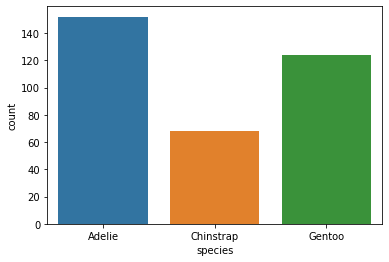

In [5]:
sns.countplot(data=df, x='species')

In [7]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [9]:
df = df.dropna()

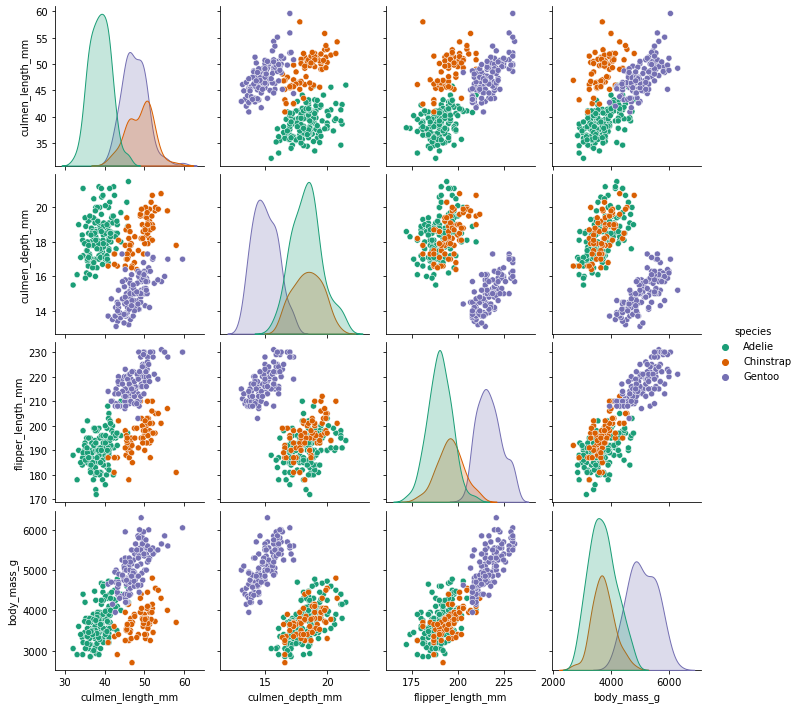

In [11]:
sns.pairplot(data=df,hue='species',palette='Dark2')

In [12]:
X = df.drop('species',axis=1)
Y = df['species']

In [13]:
X = pd.get_dummies(X, drop_first=True)

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.25)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [17]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [18]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [19]:
from sklearn.metrics import classification_report
print(classification_report(ytest,model.predict(xtest)))

              precision    recall  f1-score   support

      Adelie       0.95      0.90      0.92        40
   Chinstrap       0.81      0.87      0.84        15
      Gentoo       0.97      1.00      0.98        29

    accuracy                           0.93        84
   macro avg       0.91      0.92      0.91        84
weighted avg       0.93      0.93      0.93        84



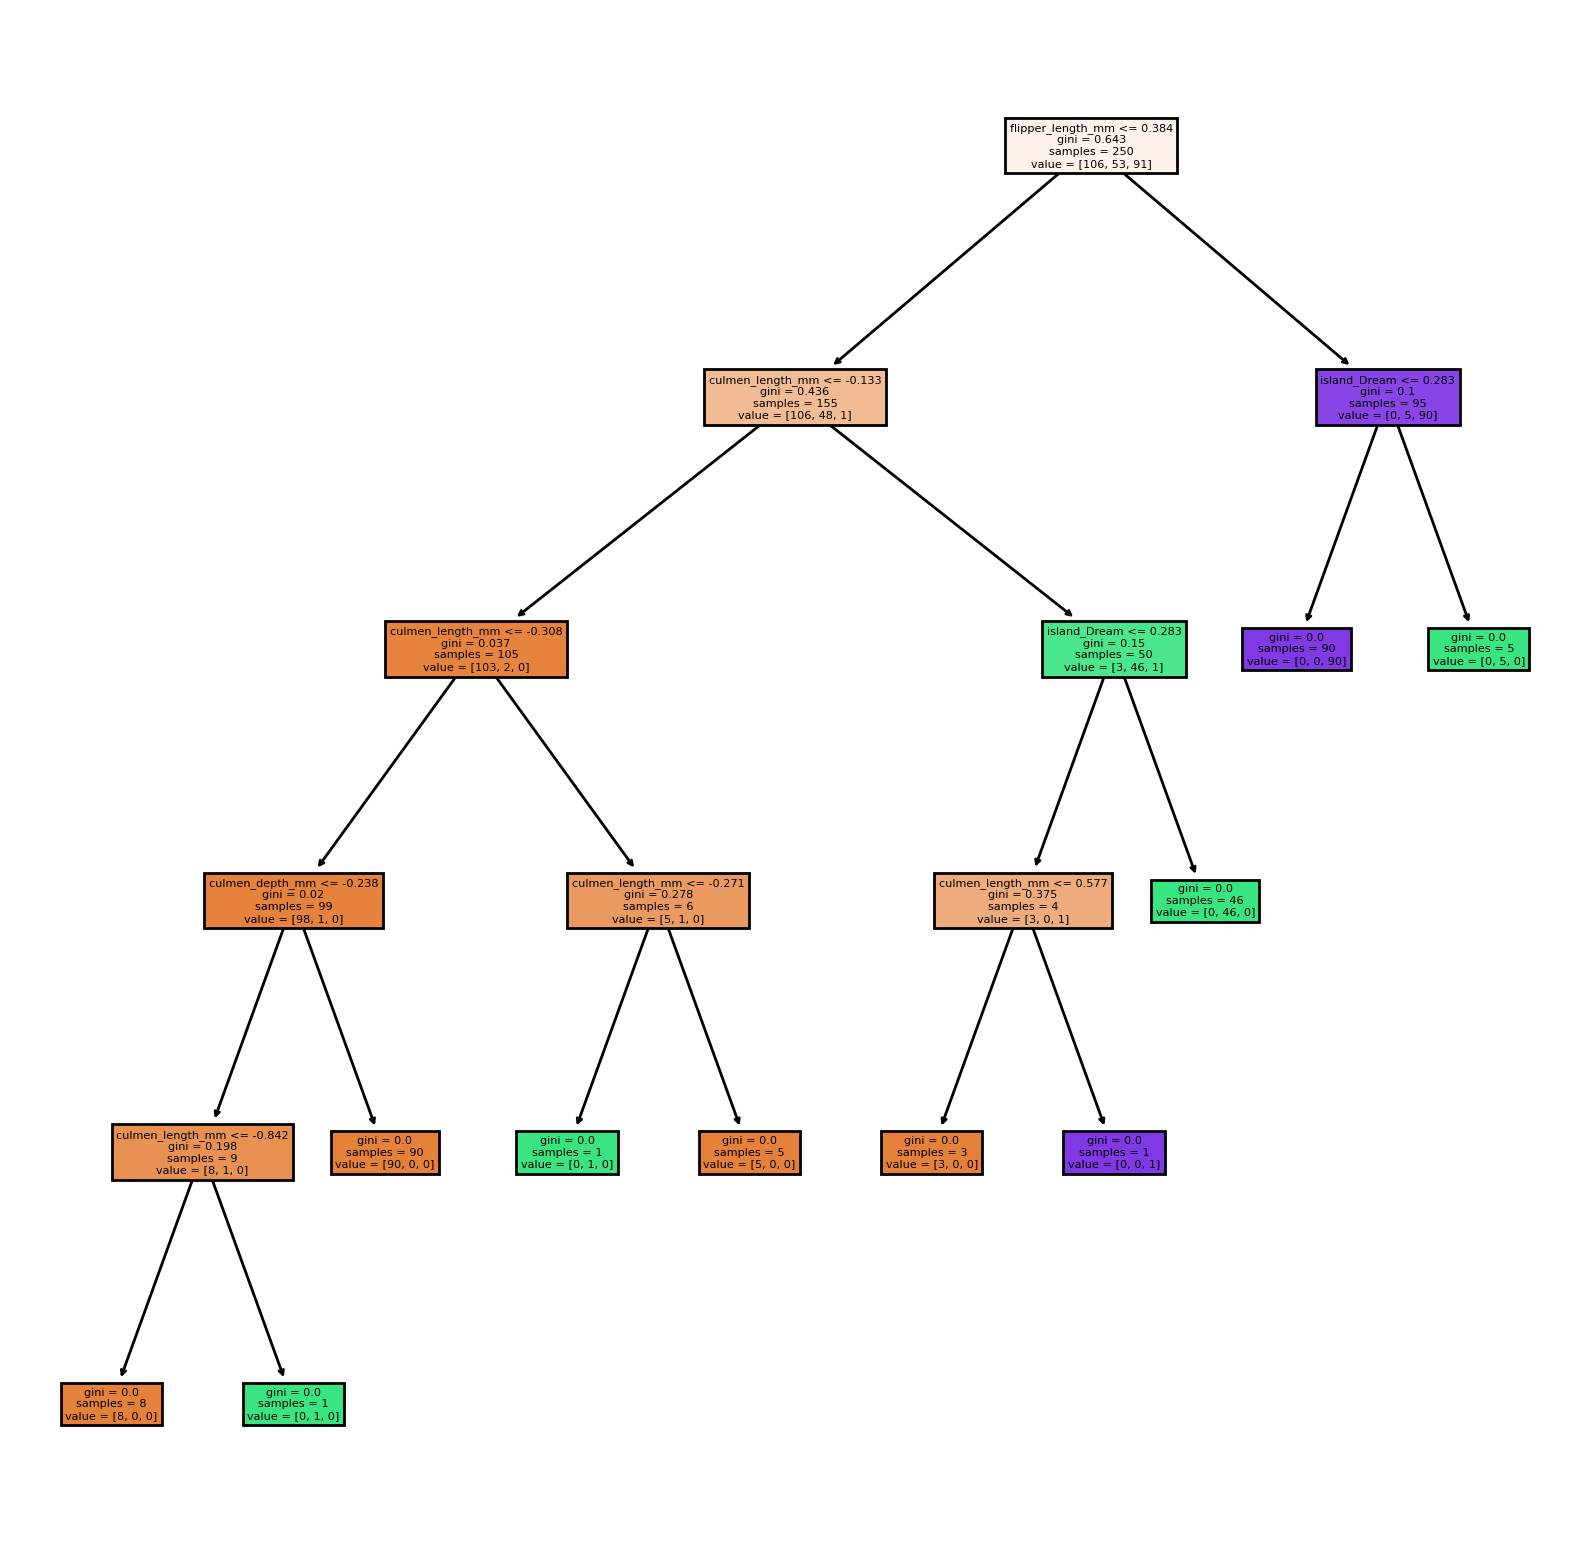

In [28]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10),dpi=200)
plot_tree(model,filled=True,feature_names=X.columns)
plt.show()

## The tree shown above clearly overfits, because of the number of samples in each of its leaves.

In [29]:
model = DecisionTreeClassifier(min_samples_leaf=5,criterion='entropy')

In [30]:
model.fit(xtrain,ytrain)
print(classification_report(ytest,model.predict(xtest)))

              precision    recall  f1-score   support

      Adelie       0.93      0.95      0.94        40
   Chinstrap       0.92      0.80      0.86        15
      Gentoo       0.97      1.00      0.98        29

    accuracy                           0.94        84
   macro avg       0.94      0.92      0.93        84
weighted avg       0.94      0.94      0.94        84



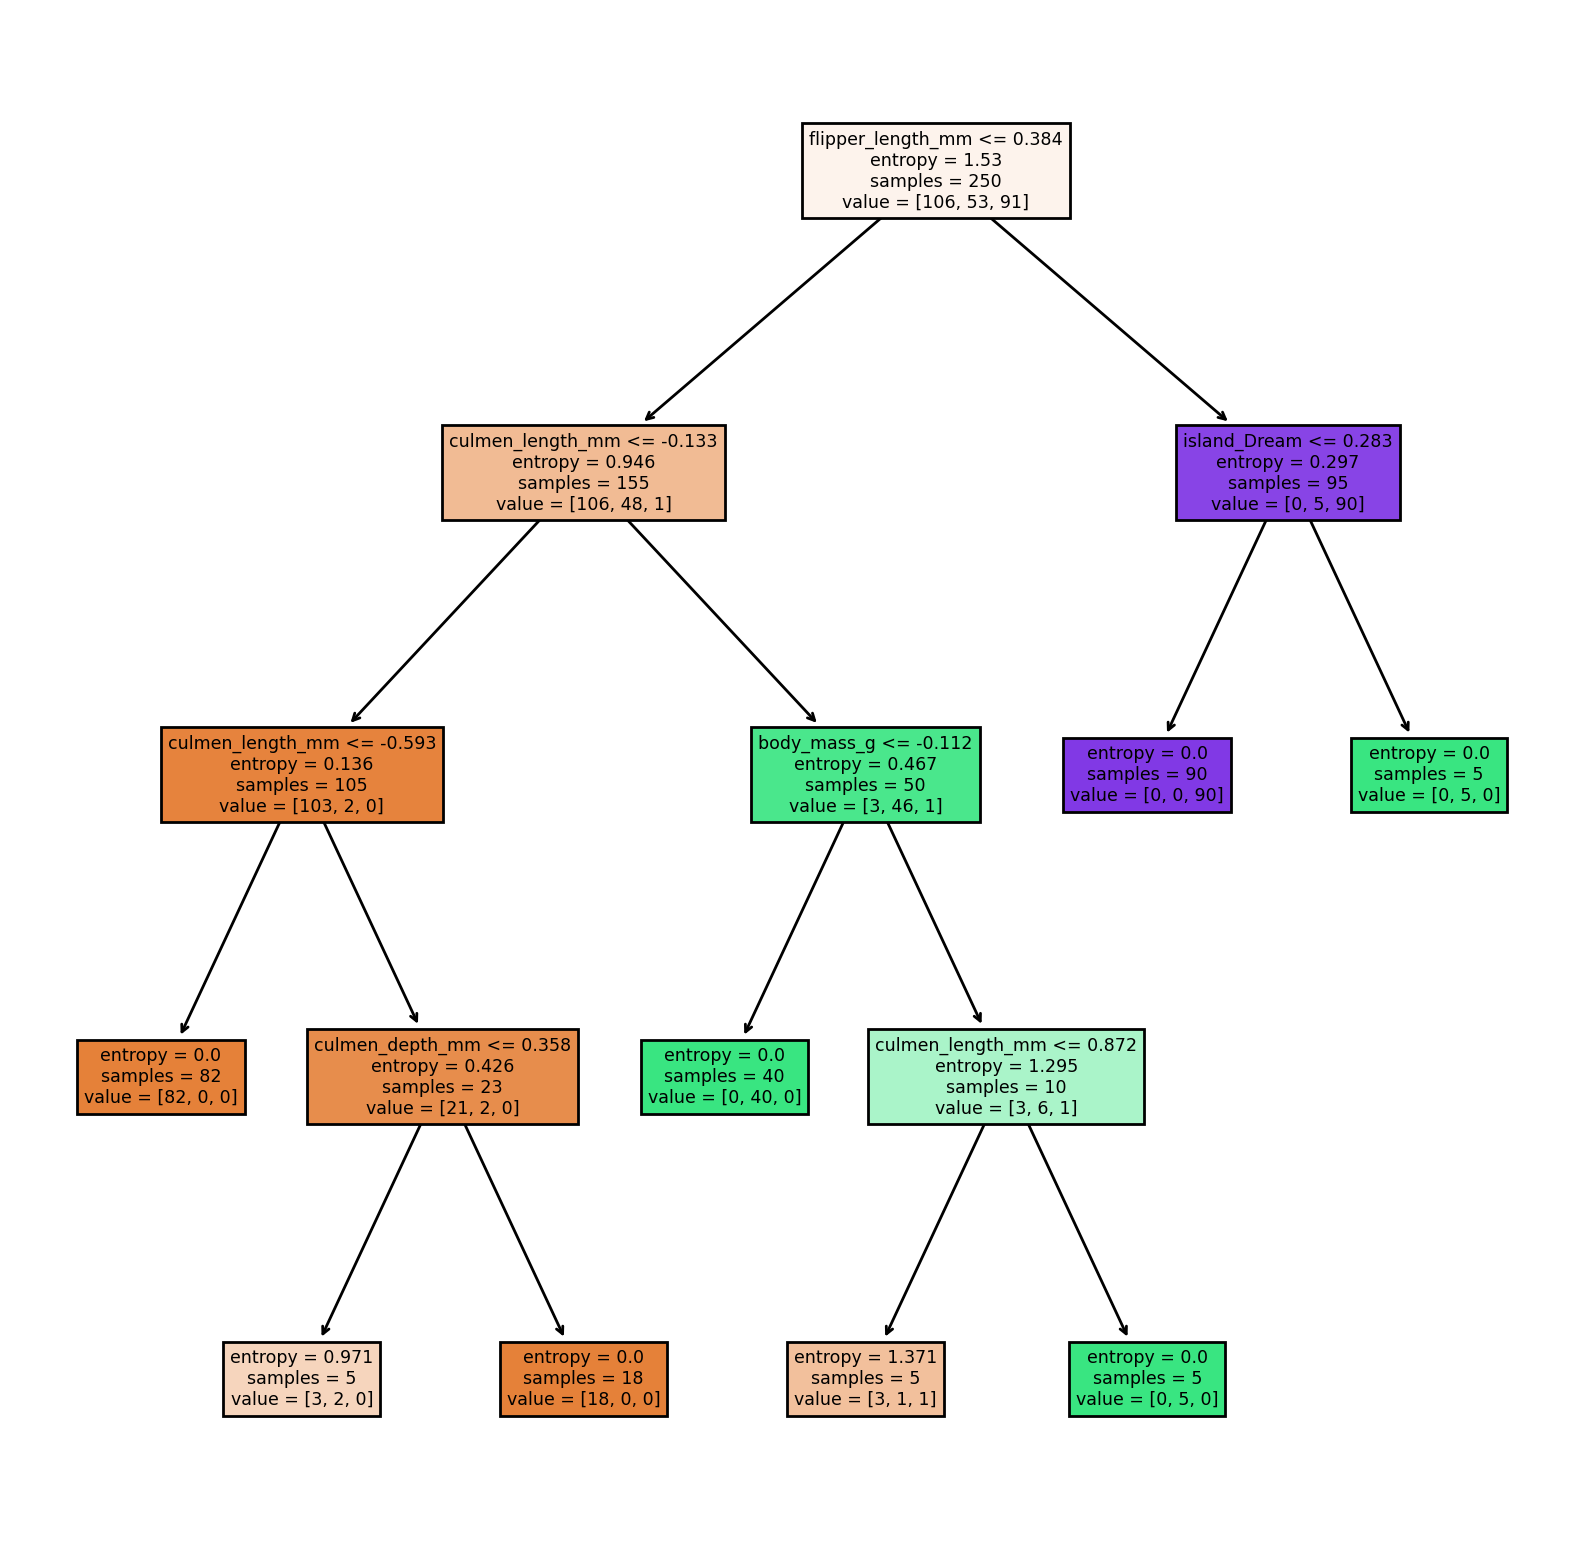

In [33]:
plt.figure(figsize=(10,10),dpi=200)
plot_tree(model,filled=True,feature_names=X.columns)
plt.show()